In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("commodity_prices.csv", parse_dates=["Date"])
df = df.sort_values("Date")  # Ensure data is sorted by date

In [17]:
df.head()

,Date,Price,Year,Month,Day
0,2019-01-01,52.483571,2019,1,1
1,2019-01-02,49.390825,2019,1,2
2,2019-01-03,53.402736,2019,1,3
3,2019-01-04,57.861590,2019,1,4
4,2019-01-05,49.157820,2019,1,5


In [19]:
df.tail()

,Date,Price,Year,Month,Day
1822,2023-12-28,198.547133,2023,12,28
1823,2023-12-29,196.503547,2023,12,29
1824,2023-12-30,200.678980,2023,12,30
1825,2023-12-31,202.127556,2023,12,31
1826,2024-01-01,194.548005,2024,1,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1827 non-null   datetime64[ns]
 1   Price   1827 non-null   float64       
 2   Year    1827 non-null   int32         
 3   Month   1827 non-null   int32         
 4   Day     1827 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 50.1 KB


In [4]:
# Step 3: Data Preprocessing
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [5]:
# Features and Target
X = df[["Year", "Month", "Day"]]  # Features (Date broken into components)
y = df["Price"]  # Target (Price)

In [6]:
# Step 4: Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Make Predictions
y_pred = model.predict(X_test)

In [9]:
# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error (MAE): 3.9930561714106587
Mean Squared Error (MSE): 25.54912445264508
R-squared Score: 0.9866748433339502


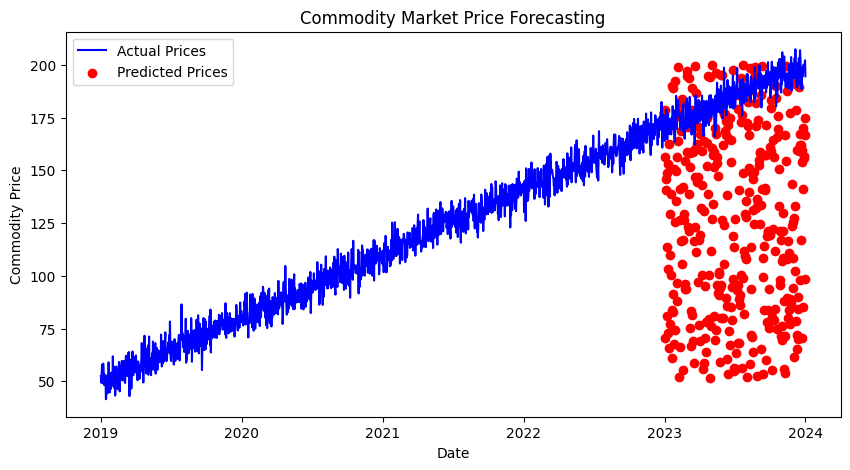

In [11]:
# Visualize Actual vs. Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Price"], label="Actual Prices", color="blue")
plt.scatter(df["Date"].iloc[-len(y_test):], y_pred, label="Predicted Prices", color="red")
plt.xlabel("Date")
plt.ylabel("Commodity Price")
plt.title("Commodity Market Price Forecasting")
plt.legend()
plt.show()

In [14]:
# Save model
import pickle
with open("commodity_price_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [15]:
# Load model
with open("commodity_price_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [22]:
# Predict for a new date
new_date = pd.to_datetime("2025-10-10")
new_data = pd.DataFrame({
    "Year": [new_date.year],
    "Month": [new_date.month],
    "Day": [new_date.day]
})

predicted_price = loaded_model.predict(new_data)

print(f"Predicted Price for {new_date.date()}: {predicted_price[0]:.2f}")

Predicted Price for 2025-10-10: 253.98
